<a href="https://colab.research.google.com/github/fargila/machine-learning-college-project/blob/main/Projeto_N%C2%BA01%2602.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto individual de regressão linear**
---

## *Átila França do Nascimento*

In [156]:
# Bibliotecas utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import scipy.stats as stats

#### **OBS.: Dados Fictícios!**
---
##### Não consegui buscar dados que fossem proveitosos para o modelo a tempo, então pedi para a IA generativa me oferecer dados irreais para a amostra. Como não é um projeto com embasamento científico apropriado, decidí realizar na hipótese de **ter** relação e **não ter** relação entre escutar música alta enquanto se estuda (também dei uma improvisada na hora da minha interpretação dos resultados).
---

##### **[VARIÁVEIS]**
> ***Intensidade:*** Nível do volume da música em decibéis (dB);  
> ***Desempenho:*** representa do desempenho do aluno estudando baseado em percentagem;

##### **[FONTES REFERÊNCIA]**
> https://www.youtube.com/watch?v=bvn8MiI2dNE;  
> https://www.youtube.com/watch?v=EMFx-oOVdY0;

## **Hipoteticamente Relacionável**

In [127]:
baseDados1 = pd.read_excel('MinhaBaseDados.xlsx', 'Plan1')
baseDados1

,Intensidade,Desempenho
0,60,95
1,62,92
2,65,90
3,68,87
4,70,85
5,72,82
6,75,80
7,78,78
8,80,75
9,82,73


In [128]:
baseDados1.describe()

,Intensidade,Desempenho
count,48.000000,48.000000
mean,78.791667,76.916667
std,11.120153,12.093313
min,60.000000,55.000000
25%,69.750000,68.000000
50%,79.500000,78.000000
75%,89.000000,87.000000
max,97.000000,98.000000


In [129]:
# Converter para Array
eixoX = baseDados1.iloc[:, 0].values
eixoY = baseDados1.iloc[:, 1].values

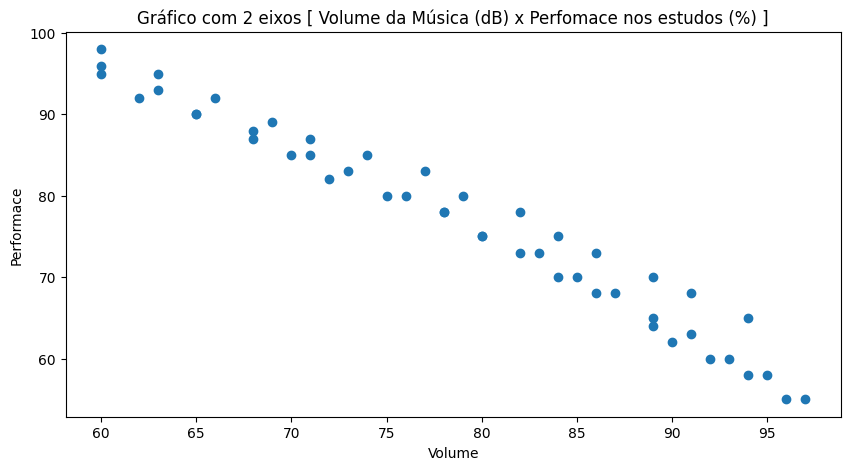

In [130]:
plt.figure( figsize=(10, 5))
plt.scatter(eixoX, eixoY)
plt.title('Gráfico com 2 eixos [ Volume da Música (dB) x Perfomace nos estudos (%) ]')
plt.xlabel('Volume')
plt.ylabel('Performace');

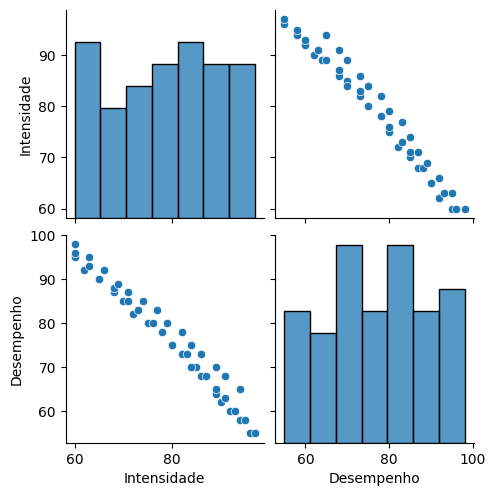

In [131]:
sns.pairplot(baseDados1);

In [132]:
Correlacao = np.corrcoef(eixoX, eixoY)
Correlacao

array([[ 1.        , -0.98280164],
       [-0.98280164,  1.        ]])

In [133]:
eixoX = eixoX.reshape(-1, 1)
eixoY = eixoY.reshape(-1, 1)

In [134]:
from sklearn.model_selection import train_test_split

x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(eixoX,
                                                                  eixoY,
                                                                  test_size=0.2)

In [135]:
print(len(x_treinamento), len(x_teste))

38 10


In [136]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_treinamento, y_treinamento)

LinearRegression()

In [137]:
regressor.score(x_treinamento, y_treinamento)

0.9704486498033629

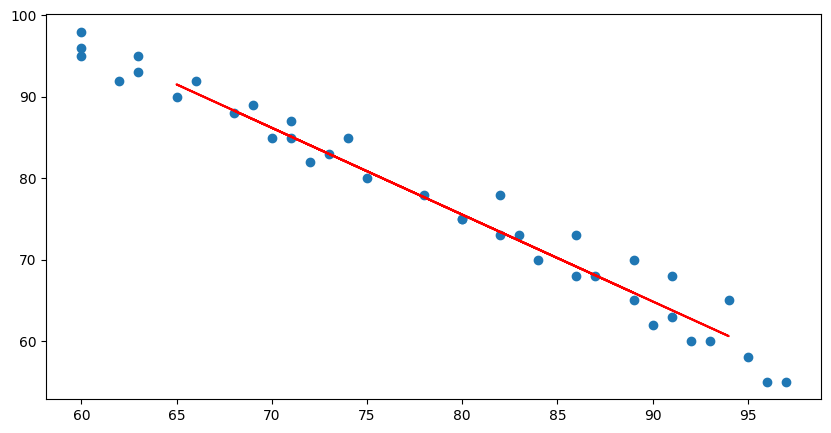

In [138]:
plt.figure(figsize=(10, 5))
plt.scatter(x_treinamento, y_treinamento)
plt.plot(x_teste, regressor.predict(x_teste), color='red');

In [139]:
previsoes = regressor.predict(x_teste)
from sklearn import metrics

print('RMSE', np.sqrt(metrics.mean_squared_error(y_teste, previsoes)))

RMSE 2.4182434378959403


In [141]:
import statsmodels.formula.api as sm

modelo_statsmodels = sm.ols(formula="Intensidade ~ Q('Desempenho')",
                            data=baseDados1).fit()

print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:            Intensidade   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     1303.
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           2.13e-35
Time:                        19:28:38   Log-Likelihood:                -102.14
No. Observations:                  48   AIC:                             208.3
Df Residuals:                      46   BIC:                             212.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         148.3024      1.949     

### **Teste de Normalidade Jarque-Bera**

In [171]:
mq0 = smf.ols(formula='Intensidade ~ Q("Desempenho")', data=baseDados1)
resultado = mq0.fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Intensidade   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     1303.
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           2.13e-35
Time:                        20:04:50   Log-Likelihood:                -102.14
No. Observations:                  48   AIC:                             208.3
Df Residuals:                      46   BIC:                             212.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         148.3024      1.949     76.096      0.000     144.380     152.225
Q("Desempenho")    -0.9037      0.025    -36.096      0.000      -0.954      -0.853
==============================================================================
Omnibus:                        5.919   Durbin-Watson:                   0.145
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                5.892
Skew:                           0.845   Prob(JB):                       0.0525
Kurtosis:                       2.700   Cond. No.                         506.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [172]:
stats.jarque_bera(resultado.resid)

SignificanceResult(statistic=5.892343913921754, pvalue=0.052540448576028465)

## **Conclusão para Hipótese Relacionável**
---
Por evidência dos resultados, é pertinente concluir que existe uma correlação entre o nível de concentração de um estudante e o volume ambiente. Demonstrando que se o aluno necessita melhorar seu desempenho acadêmico, deve procurar ambientes com pouca poluição sonora.







## **Hipoteticamente NÃO Relacionável**

In [142]:
baseDados2 = pd.read_excel('MinhaBaseDados.xlsx', 'Plan2')
baseDados2

,Intensidade,Desempenho
0,60,85
1,62,78
2,65,90
3,68,83
4,70,91
5,72,76
6,75,85
7,78,77
8,80,82
9,82,68


In [143]:
baseDados2.describe()

,Intensidade,Desempenho
count,50.000000,50.000000
mean,78.400000,81.980000
std,11.091457,5.690988
min,60.000000,68.000000
25%,69.250000,78.000000
50%,79.000000,81.500000
75%,88.500000,86.500000
max,97.000000,92.000000


In [144]:
# Converter para Array
eixoX = baseDados2.iloc[:, 0].values
eixoY = baseDados2.iloc[:, 1].values

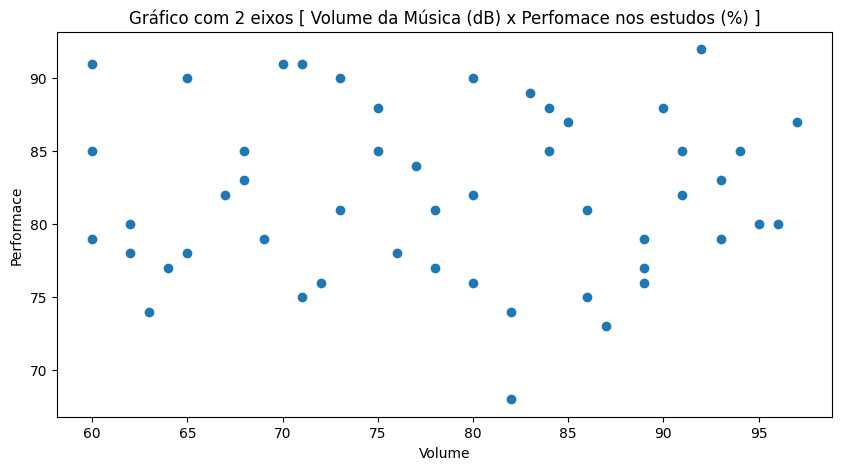

In [146]:
plt.figure( figsize=(10, 5))
plt.scatter(eixoX, eixoY)
plt.title('Gráfico com 2 eixos [ Volume da Música (dB) x Perfomace nos estudos (%) ]')
plt.xlabel('Volume')
plt.ylabel('Performace');

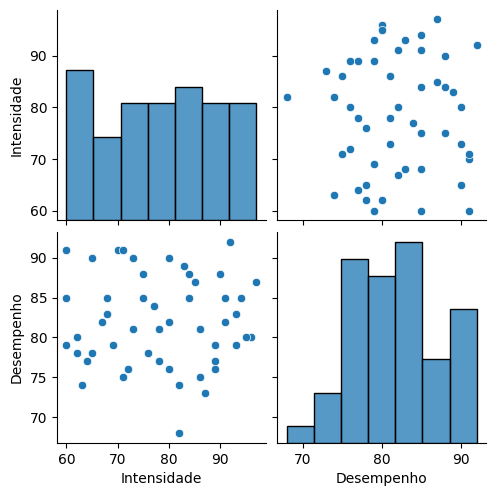

In [147]:
sns.pairplot(baseDados2);

In [148]:
Correlacao = np.corrcoef(eixoX, eixoY)
Correlacao

array([[ 1.        , -0.00375047],
       [-0.00375047,  1.        ]])

In [149]:
eixoX = eixoX.reshape(-1, 1)
eixoY = eixoY.reshape(-1, 1)

In [150]:
from sklearn.model_selection import train_test_split

x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(eixoX,
                                                                  eixoY,
                                                                  test_size=0.2)

In [151]:
print(len(x_treinamento), len(x_teste))

40 10


In [152]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_treinamento, y_treinamento)

LinearRegression()

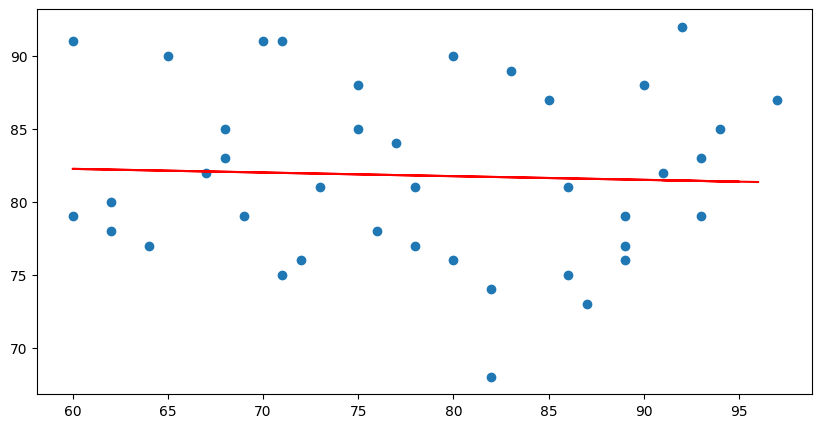

In [153]:
plt.figure(figsize=(10, 5))
plt.scatter(x_treinamento, y_treinamento)
plt.plot(x_teste, regressor.predict(x_teste), color='red');

In [154]:
previsoes = regressor.predict(x_teste)
from sklearn import metrics

print('RMSE', np.sqrt(metrics.mean_squared_error(y_teste, previsoes)))

RMSE 4.735826424782134


In [167]:
import statsmodels.formula.api as sm

modelo_statsmodels = sm.ols(formula="Intensidade ~ Q('Desempenho')",
                            data=baseDados2).fit()

print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:            Intensidade   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                 0.0006752
Date:                Sun, 08 Dec 2024   Prob (F-statistic):              0.979
Time:                        20:01:41   Log-Likelihood:                -190.75
No. Observations:                  50   AIC:                             385.5
Df Residuals:                      48   BIC:                             389.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          78.9992     23.116     

### **Teste de Normalidade Jarque-Bera**


In [168]:
mq1 = smf.ols(formula='Intensidade ~ Q("Desempenho")', data=baseDados2)
resultado2 = mq1.fit()
resultado2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Intensidade   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                 0.0006752
Date:                Sun, 08 Dec 2024   Prob (F-statistic):              0.979
Time:                        20:02:09   Log-Likelihood:                -190.75
No. Observations:                  50   AIC:                             385.5
Df Residuals:                      48   BIC:                             389.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          78.9992     23.116      3.418      0.001      32.522     125.477
Q("Desempenho")    -0.0073      0.281     -0.026      0.979      -0.573       0.558
==============================================================================
Omnibus:                       11.388   Durbin-Watson:                   0.484
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                3.001
Skew:                          -0.077   Prob(JB):                        0.223
Kurtosis:                       1.810   Cond. No.                     1.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [169]:
stats.jarque_bera(resultado2.resid)

SignificanceResult(statistic=3.000959213278086, pvalue=0.2230231711006316)

## **Conclusão para Hipótese Não Relacionável**
---
Por evidência dos resultados, é pertinente concluir que existe não há uma correlação entre o nível de concentração de um estudante e o volume ambiente. Tais condições provavelmente não alcançaram a pertinência por conta de fatores como o nível emocional do estudante, o ambiente em que está trabalhando e o genêro da música que o aluno estava ouvindo, demonstrando então, que esses fatores não estão correlacionados.
